<a href="https://colab.research.google.com/github/karthikhub19/MachineLearningAlogs/blob/main/Desicion_trees.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Decision Trees

## Building Decision Trees

## Build a model from historical data of patients
>build a model from historical data of patients, and their respond to different medications. 

>use the trained decision tree to predict the class of a unknown patient, or to find a proper drug for a new patient.

Root Node: It decides the entire population or sample data should further get divided into two or more homogeneous sets.

Splitting: It is a process of dividing a node into two or more sub-nodes.

Decision Node: This node decides whether/when a sub-node splits into further sub-nodes or not.

Leaf/ Terminal Node: Nodes do not split is called Leaf or Terminal node

In [ ]:
#calculation example
import numpy as np 
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
df = pd.read_csv("https://raw.githubusercontent.com/nethajinirmal13/Training-datasets/main/dtplay.csv")
df.head()

outlook  temp humidity  windy play
0     sunny   hot     high  False   no
1     sunny   hot     high   True   no
2  overcast   hot     high  False  yes
3     rainy  mild     high  False  yes
4     rainy  cool   normal  False  yes

In [ ]:

from sklearn import preprocessing
le = preprocessing.LabelEncoder()
cols = ['outlook', 'temp', 'humidity', 'windy','play']
# Encode labels of multiple columns at once
df[cols] = df[cols].apply(le.fit_transform)

# Print head
#
df.head()


outlook  temp  humidity  windy  play
0        2     1         0      0     0
1        2     1         0      1     0
2        0     1         0      0     1
3        1     2         0      0     1
4        1     0         1      0     1

In [ ]:
X = df[['outlook', 'temp', 'humidity', 'windy']].values
y = df["play"]

model= DecisionTreeClassifier(criterion="gini", max_depth = 4)
model.fit(X,y)


DecisionTreeClassifier(max_depth=4)

In [ ]:
yhat = model.predict(X)
yhat[:5]

array([0, 0, 1, 1, 1])

In [ ]:
model.score(X, yhat)

1.0

In [ ]:
# Visualize data
from six import StringIO
import pydotplus
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
from sklearn import tree
import collections
data_feature_names=['outlook', 'temp', 'humidity', 'windy']
dot_data = tree.export_graphviz(model,
                                feature_names=data_feature_names,
                                out_file=None,
                                filled=True,
                                rounded=True)
graph = pydotplus.graph_from_dot_data(dot_data)

colors = ('red', 'orange')
edges = collections.defaultdict(list)

for edge in graph.get_edge_list():
    edges[edge.get_source()].append(int(edge.get_destination()))

for edge in edges:
    edges[edge].sort()    
    for i in range(2):
        dest = graph.get_node(str(edges[edge][i]))[0]
        dest.set_fillcolor(colors[i])

graph.write_png('tree.png')


True

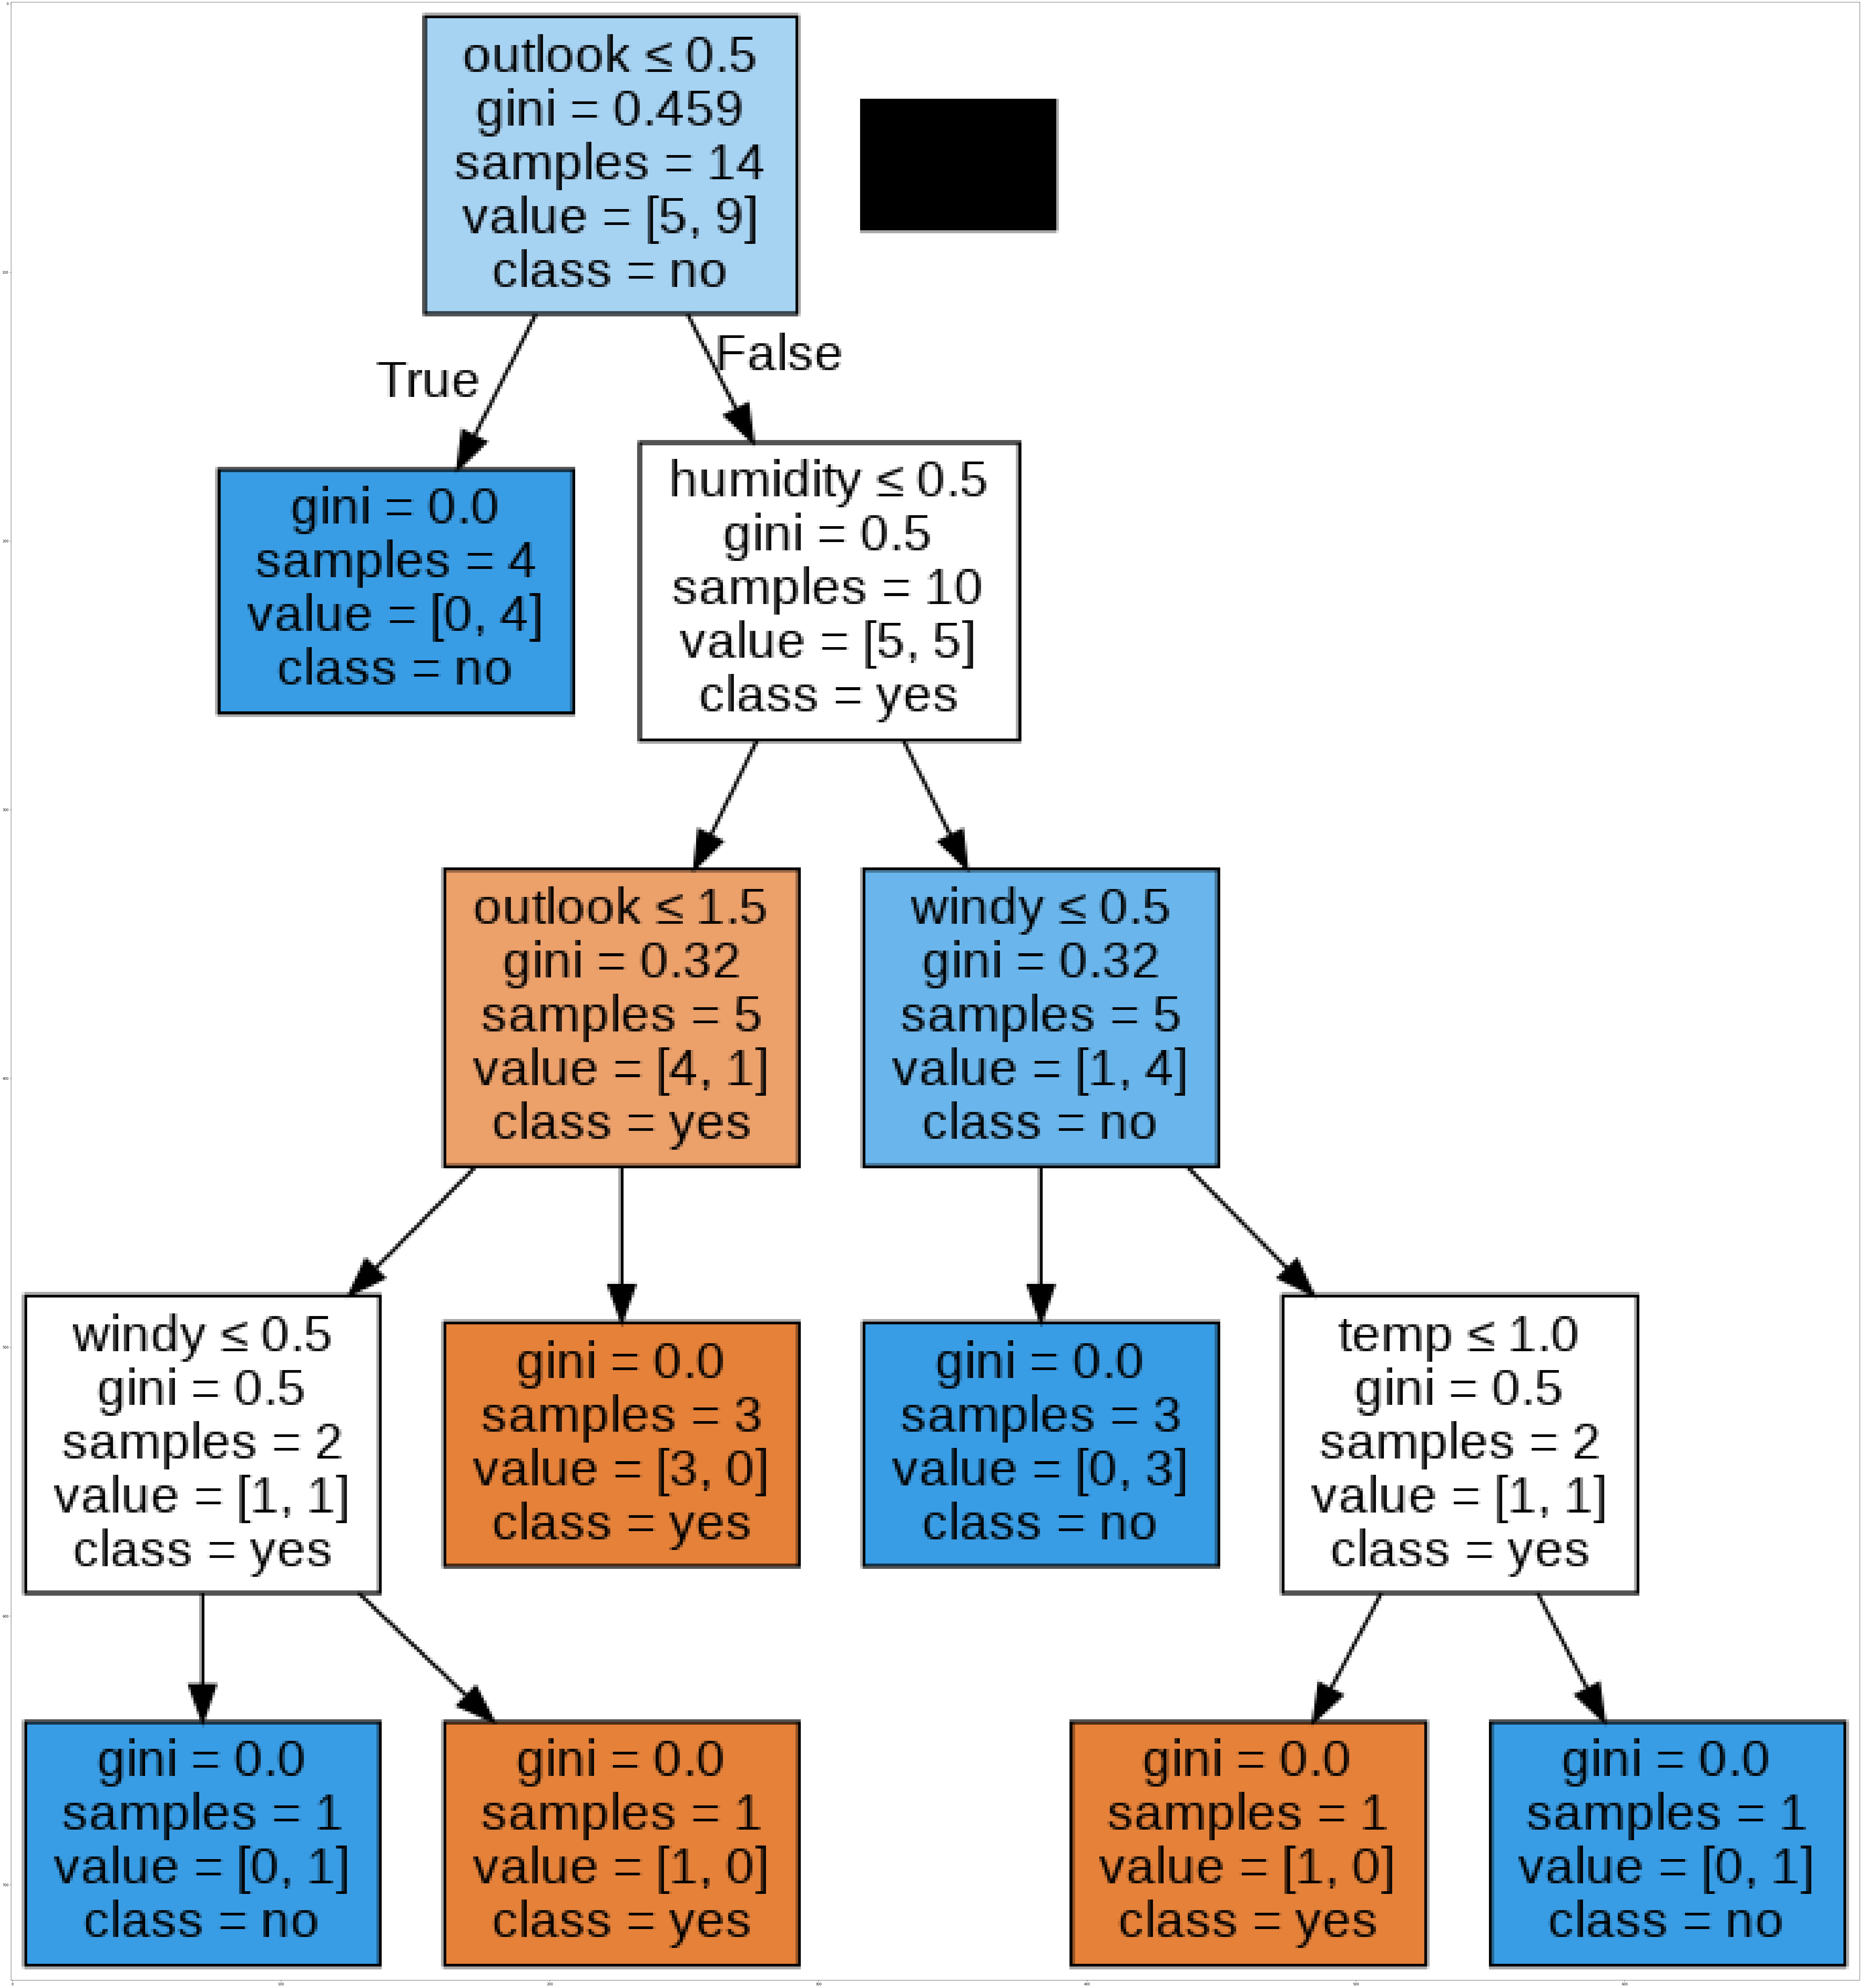

In [ ]:
from six import StringIO
import pydotplus
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
from sklearn import tree
%matplotlib inline 
dot_data = StringIO()
filename = "drugtree.png"
featureNames = ['outlook', 'temp', 'humidity', 'windy']
#targetNames = df["Drug"].unique().tolist()
out=tree.export_graphviz(model,feature_names=featureNames, out_file=dot_data, class_names=['yes','no'], filled=True,  special_characters=True,rotate=False)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png(filename)
img = mpimg.imread(filename)
plt.figure(figsize=(100, 200))
plt.imshow(img,interpolation='nearest')

In [ ]:
import numpy as np 
import pandas as pd
from sklearn.tree import DecisionTreeClassifier

In [ ]:
import numpy as np
import pandas as pd
import os
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn import tree
from sklearn.metrics import accuracy_score,confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
data = 'https://raw.githubusercontent.com/nethajinirmal13/Training-datasets/main/heart.csv'
df = pd.read_csv(data)
df.head()


age  sex  cp  trestbps  chol  fbs  ...  exang  oldpeak  slope  ca  thal  target
0   63    1   3       145   233    1  ...      0      2.3      0   0     1       1
1   37    1   2       130   250    0  ...      0      3.5      0   0     2       1
2   41    0   1       130   204    0  ...      0      1.4      2   0     2       1
3   56    1   1       120   236    0  ...      0      0.8      2   0     2       1
4   57    0   0       120   354    0  ...      1      0.6      2   0     2       1

[5 rows x 14 columns]

In [ ]:
X = df.drop(columns=['target'])
y = df['target']
print(X.shape)
print(y.shape)

(303, 13)
(303,)


In [ ]:
x_train,x_test,y_train,y_test = train_test_split(X,y,stratify=y)
print(x_train.shape)
print(x_test.shape)

(227, 13)
(76, 13)


In [ ]:
clf = tree.DecisionTreeClassifier(random_state=0)
clf.fit(x_train,y_train)
y_train_pred = clf.predict(x_train)
y_test_pred = clf.predict(x_test)

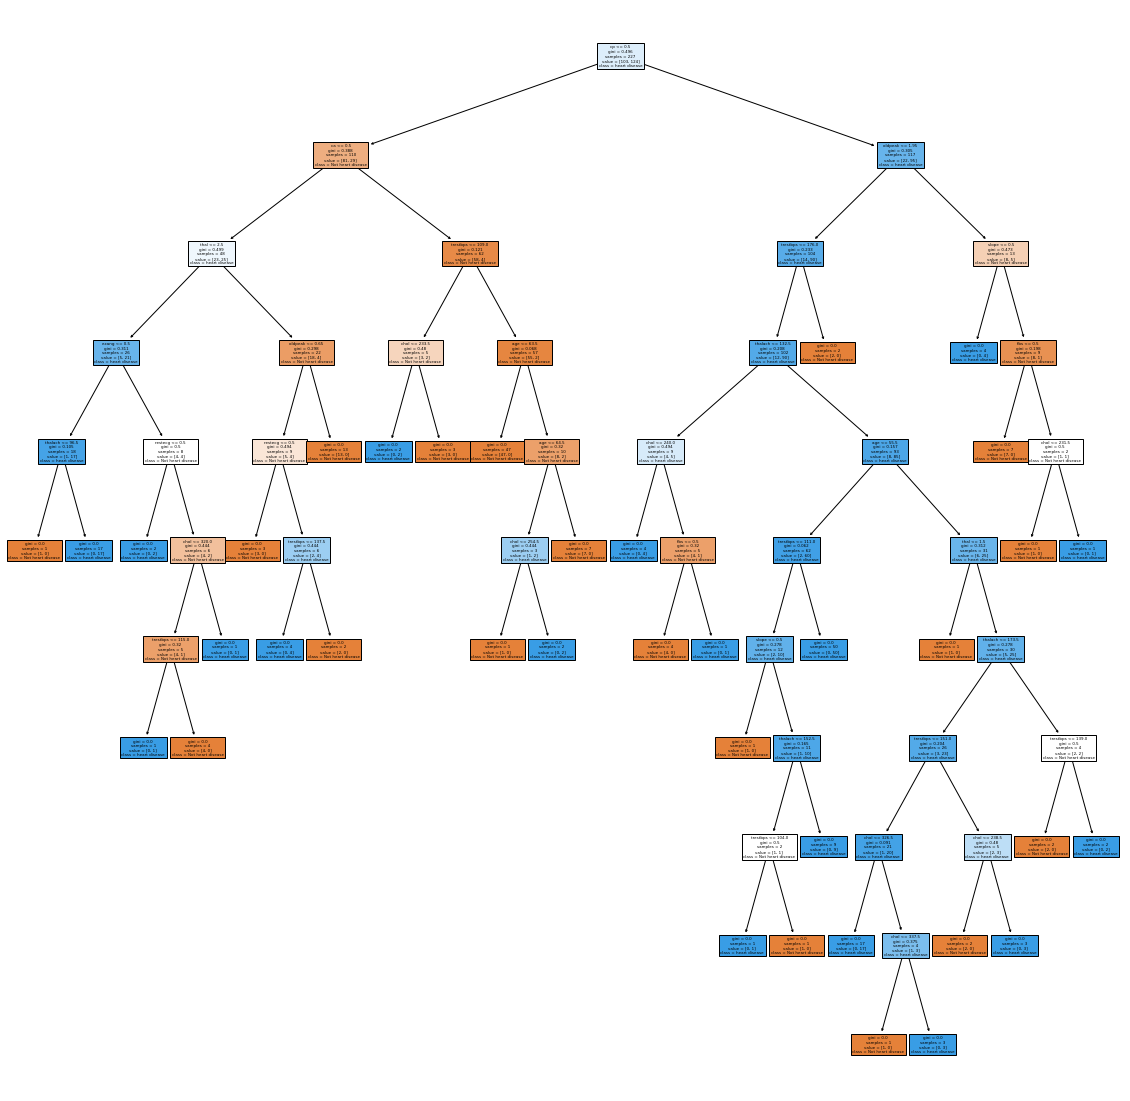

In [ ]:
plt.figure(figsize=(20,20))
features = df.columns
classes = ['Not heart disease','heart disease']
tree.plot_tree(clf,feature_names=features,class_names=classes,filled=True)
plt.show()

Train score 1.0
Test score 0.7894736842105263
Train Confusion matrix


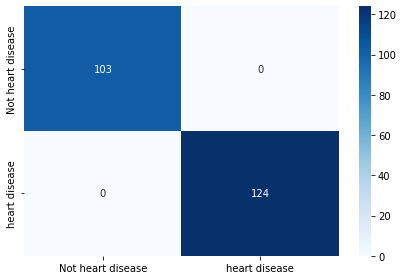

Test Confusion matrix


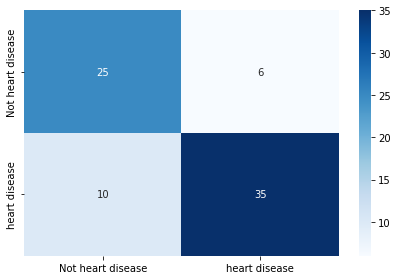

In [ ]:
# helper function
def plot_confusionmatrix(y_train_pred,y_train,dom):
    print(f'{dom} Confusion matrix')
    cf = confusion_matrix(y_train_pred,y_train)
    sns.heatmap(cf,annot=True,yticklabels=classes
               ,xticklabels=classes,cmap='Blues', fmt='g')
    plt.tight_layout()
    plt.show()
print(f'Train score {accuracy_score(y_train_pred,y_train)}')
print(f'Test score {accuracy_score(y_test_pred,y_test)}')
plot_confusionmatrix(y_train_pred,y_train,dom='Train')
plot_confusionmatrix(y_test_pred,y_test,dom='Test')
   

We can see that in our train data we have 100% accuracy (100 % precison and recall). But in test data model is not well generalizing. We have just 75% accuracy. Over model is clearly overfitting. 

An effective way to do is that we can grid search those parameters and choose the optimum values that gives better performace on test data.

As of now we will control these parameters

max_depth: maximum depth of decision tree

min_sample_split: The minimum number of samples required to split an internal node:

min_samples_leaf: The minimum number of samples required to be at a leaf node.

In [ ]:
params = {'max_depth': [2,4,6,8,10,12],
         'min_samples_split': [2,3,4],
         'min_samples_leaf': [1,2]}

clf = tree.DecisionTreeClassifier()
gcv = GridSearchCV(estimator=clf,param_grid=params)
gcv.fit(x_train,y_train)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [2, 4, 6, 8, 10, 12],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 3, 4]})

Train score 0.9427312775330396
Test score 0.7894736842105263
Train Confusion matrix


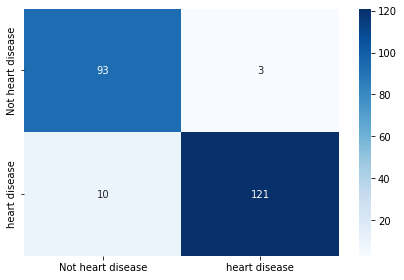

Test Confusion matrix


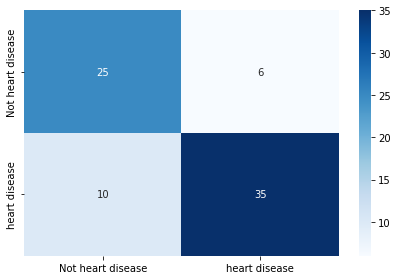

In [ ]:
model = gcv.best_estimator_
model.fit(x_train,y_train)
y_train_pred = model.predict(x_train)
y_test_pred = model.predict(x_test)

print(f'Train score {accuracy_score(y_train_pred,y_train)}')
print(f'Test score {accuracy_score(y_test_pred,y_test)}')
plot_confusionmatrix(y_train_pred,y_train,dom='Train')
plot_confusionmatrix(y_test_pred,y_test,dom='Test')

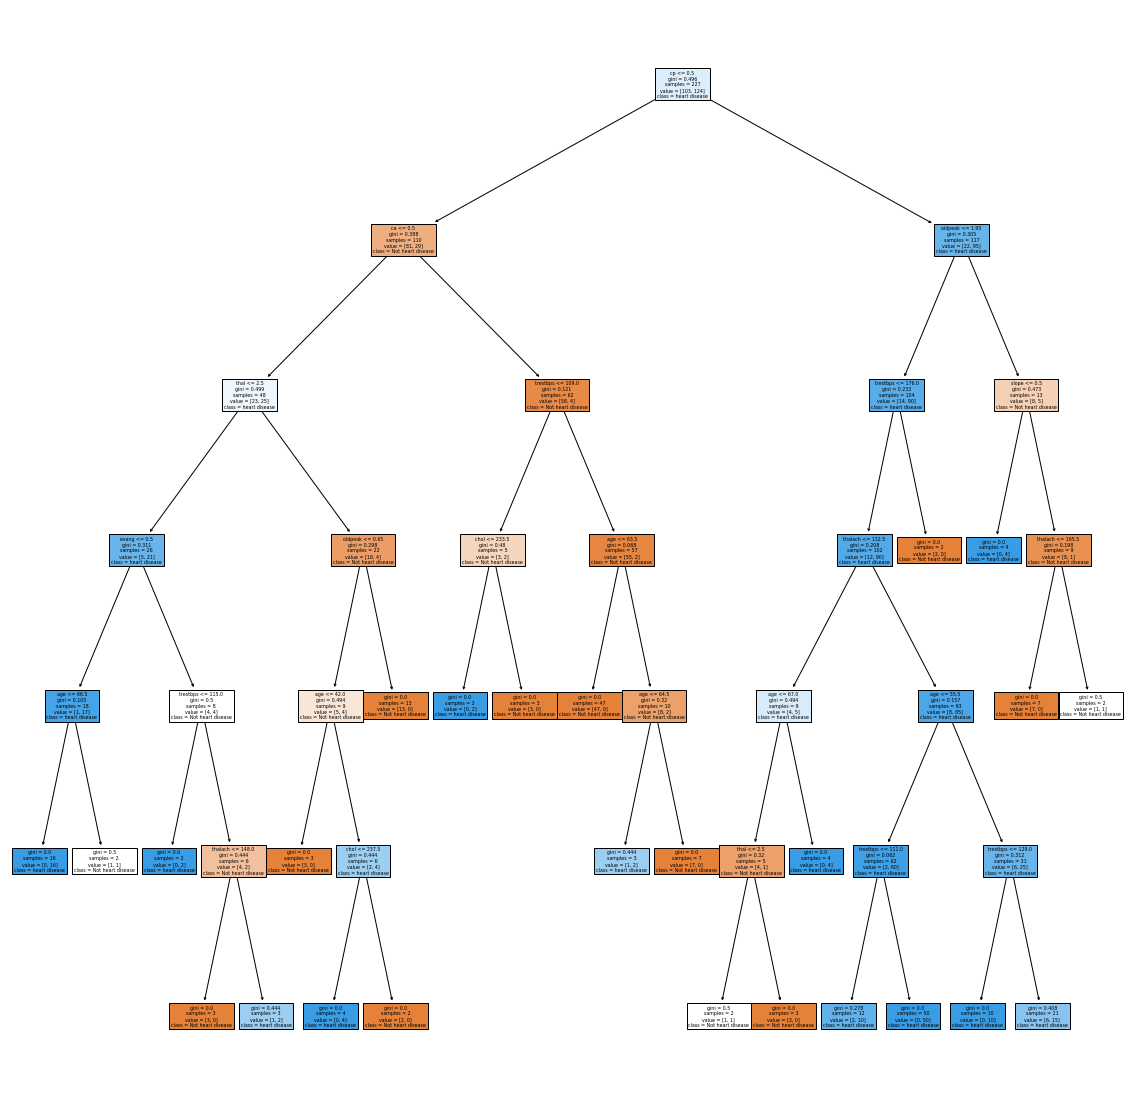

In [ ]:
plt.figure(figsize=(20,20))
features = df.columns
classes = ['Not heart disease','heart disease']
tree.plot_tree(model,feature_names=features,class_names=classes,filled=True)
plt.show()

In [ ]:
!pip install dtreeviz

     |████████████████████████████████| 61 kB 1.1 kB/s 
  Created wheel for dtreeviz: filename=dtreeviz-1.3.3-py3-none-any.whl size=67113 sha256=59d45f373f82c45f721b9f06532ca44075be4f6322bd7c10f94a4f87f1a60572
  Stored in directory: /root/.cache/pip/wheels/58/9d/65/e57deb90bf5440945d74bc4c19ebb14a0de2ed2b508c609673
Successfully built dtreeviz


DT


In [ ]:
!pip install dtreeviz

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn import tree
from dtreeviz.trees import *
import graphviz 

import warnings
warnings.filterwarnings("ignore") 
wine = pd.read_csv('https://raw.githubusercontent.com/nethajinirmal13/Training-datasets/main/winequalityN.csv')
wine.head()

type  fixed acidity  volatile acidity  ...  sulphates  alcohol  quality
0  white            7.0              0.27  ...       0.45      8.8        6
1  white            6.3              0.30  ...       0.49      9.5        6
2  white            8.1              0.28  ...       0.44     10.1        6
3  white            7.2              0.23  ...       0.40      9.9        6
4  white            7.2              0.23  ...       0.40      9.9        6

[5 rows x 13 columns]

In [ ]:
wine['quality'].value_counts()


6    2836
5    2138
7    1079
4     216
8     193
3      30
9       5
Name: quality, dtype: int64

In [ ]:
#features = wine.drop('type',axis=1)
#features = wine.drop('quality',axis=1)
features = wine.drop(['quality','type'],axis=1)
target = wine['quality']
features.head()

fixed acidity  volatile acidity  citric acid  ...    pH  sulphates  alcohol
0            7.0              0.27         0.36  ...  3.00       0.45      8.8
1            6.3              0.30         0.34  ...  3.30       0.49      9.5
2            8.1              0.28         0.40  ...  3.26       0.44     10.1
3            7.2              0.23         0.32  ...  3.19       0.40      9.9
4            7.2              0.23         0.32  ...  3.19       0.40      9.9

[5 rows x 11 columns]

In [ ]:
features.isnull().sum()


fixed acidity           10
volatile acidity         8
citric acid              3
residual sugar           2
chlorides                2
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       9
sulphates                4
alcohol                  0
dtype: int64

In [ ]:
cleanfeat=features.fillna(method="ffill")

In [ ]:
cleanfeat.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
dtype: int64

In [ ]:
fig = plt.figure(figsize=(25,20))
regr= tree.DecisionTreeRegressor(max_depth=3)  
regr.fit(cleanfeat, target)
viz = dtreeviz(regr,
               cleanfeat,
               target,
               target_name='wine quality',
               feature_names=features.columns,
               title="Wine data set regression",
               fontname="Arial",
               colors = {"title":"purple"},
               scale=1.5)
viz

findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


<Figure size 1800x1440 with 0 Axes>

findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


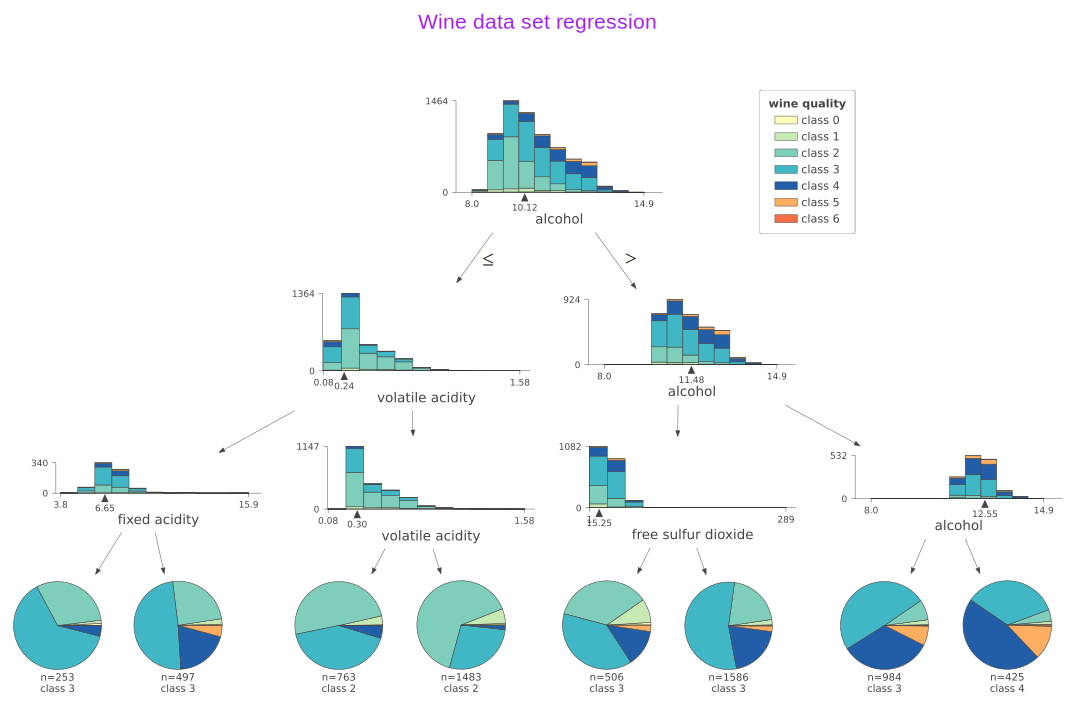

<Figure size 1800x1440 with 0 Axes>

In [ ]:
#orientation='LR'
fig = plt.figure(figsize=(25,20))
regr= tree.DecisionTreeClassifier(max_depth=3)  
regr.fit(cleanfeat, target)
viz = dtreeviz(regr,
               cleanfeat,
               target,
               target_name='wine quality',
               feature_names=features.columns,
               title="Wine data set regression",
               fontname="Arial",
               colors = {"title":"purple"},
               orientation='RR',
               scale=1.5)
viz
